# Face Swap Project
in this project, we will be using  opencv and dlib to extract face of human-beings from given image. We will use a pretrained model tom extract landmarks from the face

In [ ]:
# import libarary
import cv2
import numpy as np
import dlib
import requests
from PIL import Image

### Download a face shape_predictor pretrained  model from gitub

In [ ]:
# pretrained model
!wget 'https://github.com/tzutalin/dlib-android/raw/master/data/shape_predictor_68_face_landmarks.dat'

--2025-12-16 22:38:50--  https://github.com/tzutalin/dlib-android/raw/master/data/shape_predictor_68_face_landmarks.dat
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tzutalin/dlib-android/master/data/shape_predictor_68_face_landmarks.dat [following]
--2025-12-16 22:38:50--  https://raw.githubusercontent.com/tzutalin/dlib-android/master/data/shape_predictor_68_face_landmarks.dat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99693937 (95M) [application/octet-stream]
Saving to: ‘shape_predictor_68_face_landmarks.dat.2’

shape_predictor_68_ 100%[===================>]  95.08M   149MB/s    in 0.6s

In [ ]:
# create a function to extract the index from the numpy array
def extract_index_nparray(nparray):
  index = None
  for num in nparray[0]:
    index = num
    break
  return index

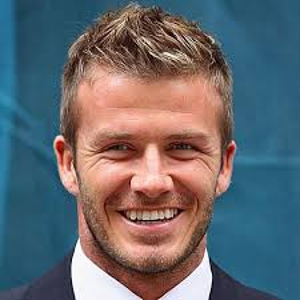

In [ ]:
# Reading image from Url
image1 = Image.open(requests.get('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSx8Pu1tW1uCiZPfj9K1EL6uHxbg3bOKO9XkA&usqp=CAU', stream=True).raw)
image1 = image1.resize((300, 300))
image1

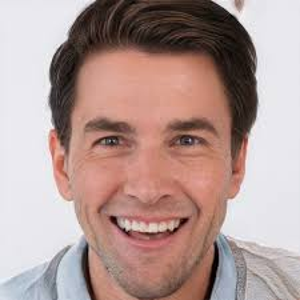

In [ ]:
# Now let load the second image which face we will use to swap the first image
image2 = Image.open(requests.get('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTYX1dyl9INRo5cbvDeTILRcZVzfcMsCsE0kg&usqp=CAU', stream= True).raw)
image2 = image2.resize((300, 300))
image2

### W e now convert our image into numpy array and convert it into gray scall


In [ ]:
# convert image into nparray
img = np.array(image1)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img2 = np.array(image2)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
mask = np.zeros_like(img_gray)

### we will load Face detector and Face landmarks predictor using dlib and then we will find the height, width, channels which are required for creating empty image with zeros

In [ ]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')
height, width, channels = img2.shape
img2_new_face = np.zeros((height, width, channels), np.uint8)

####  
Now we will extract the face point in grey image, after we will us ethe shape predictor to predict the face and save it x, y cordinate, after that we will create a mask with the landmark points, and create a plastic which will cover on the mask pts
After we will

In [ ]:
# Face 1
face = detector(img_gray)
for face in face:
  landmarks = predictor(img_gray, face)
  landmarks_points = []
  for n in range(0, 68):
    x = landmarks.part(n).x
    y = landmarks.part(n).y
    landmarks_points.append((x, y))
  points = np.array(landmarks_points, dtype=np.int32)
  convexhull = cv2.convexHull(points)
  cv2.fillConvexPoly(mask, convexhull, 255)
  face_image_1 = cv2.bitwise_and(img, img, mask=mask)

  # Triangulation
  rect = cv2.boundingRect(convexhull)
  subdiv = cv2.Subdiv2D(rect)
  subdiv.insert(landmarks_points)
  triangles = subdiv.getTriangleList()
  triangles = np.array(triangles, dtype=np.int32)
  indexes_triangles = []
  for t in triangles:
    pt1 = (t[0], t[1])
    pt2 = (t[2], t[3])
    pt3 = (t[4], t[5])

    index_pt1 = np.where((points == pt1).all(axis=1))
    index_pt1 = extract_index_nparray(index_pt1)

    index_pt2 = np.where((points == pt2).all(axis=1))
    index_pt2 = extract_index_nparray(index_pt2)

    index_pt3 = np.where((points == pt3).all(axis=1))
    index_pt3 = extract_index_nparray(index_pt3)

    if index_pt1 is not None and index_pt2 is not None and index_pt3 is not None:
      triangle = [index_pt1, index_pt2, index_pt3]
      indexes_triangles.append(triangle)






In [ ]:
# Face 2
faces2 = detector(img2_gray)
for face  in faces2:
  landmarks = predictor(img2_gray, face)
  landmarks_points2 = []
  for n in range(0, 68):
    x = landmarks.part(n).x
    y = landmarks.part(n).y
    landmarks_points2.append((x, y))


    points2 = np.array(landmarks_points2, np.int32)
    convexhull2 = cv2.convexHull(points2)



In [ ]:
lines_space_mask = np.zeros_like(img_gray)
lines_space_new_face = np.zeros_like(img2)


In [ ]:
# triangulation of both faces
for triangle_index in indexes_triangles:
  # Triangulation of first face
  tr1_pt1 = landmarks_points[triangle_index[0]]
  tr1_pt2 = landmarks_points[triangle_index[1]]
  tr1_pt3 = landmarks_points[triangle_index[2]]
  triangle1 = np.array([tr1_pt1, tr1_pt2, tr1_pt3], np.int32)


  rect1 = cv2.boundingRect(triangle1)
  (x, y, w, h) = rect1
  cropped_triangle = img[y: y + h, x: x + w]
  cropped_tr1_mask = np.zeros((h, w), np.uint8)

  points = np.array([
      [tr1_pt1[0]- x, tr1_pt1[1] - y],
                    [tr1_pt2[0]- x, tr1_pt2[1] - y],
                    [tr1_pt3[0]- x, tr1_pt3[1] - y]]
                    , np.int32)
  cv2.fillConvexPoly(cropped_tr1_mask, points, 255)

  # line space optional
  # cv2.line(lines_space_mask, tr1_pt1, tr1_pt2, 255)
  #cv2.line(lines_space_mask, tr1_pt2, tr1_pt3, 255)
  #cv2.line(lines_space_mask, tr1_pt1, tr1_pt3, 255)
  #lines_space = cv2.bitwise_and(img, img, mask=lines_space_mask)




  # Triangulation of second face
  tr2_pt1 = landmarks_points2[triangle_index[0]]
  tr2_pt2 = landmarks_points2[triangle_index[1]]
  tr2_pt3 = landmarks_points2[triangle_index[2]]
  triangle2 = np.array([tr2_pt1, tr2_pt2, tr2_pt3], np.int32)

  rect2 =cv2.boundingRect(triangle2)
  cropped_tr2_mask = np.zeros((rect2[3], rect2[2]), np.uint8)

  points2 = np.array([[tr2_pt1[0] - x, tr2_pt1[1] - y],
                      [tr2_pt2[0] - x, tr2_pt2[1] - y],
                      [tr2_pt3[0] - x, tr2_pt3[1] - y]], np.int32)
  cv2.fillConvexPoly(cropped_tr2_mask, points2, 255)

  # wrapped the triangle
  points = np.float32(points)
  points2 = np.float32(points2)
  M = cv2.getAffineTransform(points, points2)
  h2, w2 = cropped_tr2_mask.shape
  warped_triangle = cv2.warpAffine(cropped_triangle, M, (w2, h2))
  warped_triangle = cv2.bitwise_and(warped_triangle, warped_triangle, mask=cropped_tr2_mask)

  # Reconstruction destination
  img2_new_face_rect_area = img2_new_face[y: y + h, x: x + w]
  img2_new_face_rect_area_gray = cv2.cvtColor(img2_new_face_rect_area, cv2.COLOR_BGR2GRAY)
  _, mask_triangles_designed = cv2.threshold(
      img2_new_face_rect_area_gray, 1, 255, cv2.THRESH_BINARY_INV
      )
  # Added
  mask_triangles_designed = mask_triangles_designed.astype("uint8")
  mask_triangles_designed = cv2.resize(mask_triangles_designed, (warped_triangle.shape[1], warped_triangle.shape[0]))

  warped_triangle = cv2.bitwise_and(warped_triangle, warped_triangle, mask=mask_triangles_designed)

  # finis
  #warped_triangle = cv2.bitwise_and(warped_triangles_designed, warped_triangles, mask=mask_triangles_designed)
  # added
  # make dtype same
  if warped_triangle.dtype != img2_new_face_rect_area.dtype:
    warped_triangle = warped_triangle.astype(img2_new_face_rect_area.dtype)

  # make channels same (gray -> BGR)
  if len(warped_triangle.shape) == 2 and len(img2_new_face_rect_area.shape) == 3:
    warped_triangle = cv2.cvtColor(warped_triangle, cv2.COLOR_GRAY2BGR)

  # make size same
  h, w = img2_new_face_rect_area.shape[:2]
  if warped_triangle.shape[0] != h or warped_triangle.shape[1] != w:
    warped_triangle = cv2.resize(warped_triangle, (w, h))

  # finis

  img2_new_face_rect_area = cv2.add(img2_new_face_rect_area, warped_triangle)
  img2_new_face[y: y + h, x: x + w] = img2_new_face_rect_area




In [ ]:
# Face swapped
img2_face_mask = np.zeros_like(img2_gray)
img2_head_mask = cv2.fillConvexPoly(img2_face_mask, convexhull2, 255)
img2_face_mask = cv2.bitwise_not(img2_head_mask)

In [ ]:
img2_head_noface =cv2.bitwise_and(img2, img2, mask = img2_face_mask)
result = cv2.add(img2_head_noface, img2_new_face)

### now let's adjust the color

In [ ]:
(x, y, w, h) = cv2.boundingRect(convexhull2)
center_face2 = (int((x + x + w) / 2), int((y + y + h) / 2))
seamlessClone = cv2.seamlessClone(result, img2, img2_head_mask, center_face2, cv2.NORMAL_CLONE)

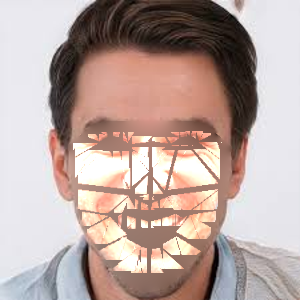

In [ ]:
Image.fromarray(seamlessClone)